## Appliance Energy Consumption Forecasting

### Kalila Lin



#### Attribute Information based on the paper:

date, time year-month-day hour : minute : second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

T_out, Temperature outside (from Chievres weather station), in Celsius

Press_mm_hg, (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Windspeed, (from Chievres weather station), in m/s

Visibility, (from Chievres weather station), in km

Tdewpoint, (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

### 1. Read the dataset

In [1]:
#import from library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the data
df = pd.read_csv("./energydata_complete.csv")

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#get to know more the data 
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [4]:
#Check if any missing values
df.info()

#check if missing value or irregular value by checking the unique value of each columns
columns = df.columns

for i in columns:
    unique_values = np.unique(df[i])
    print("Unique values in column '{}': {}".format(i, unique_values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
#check if any null values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
#since columns names has lower and upper case in between, it is better to unify them all into lower case
df.columns = [i.lower() for i in df.columns]

df.head()

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
#since the date is in object dtype, we have to convert it
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   t1           19735 non-null  float64       
 4   rh_1         19735 non-null  float64       
 5   t2           19735 non-null  float64       
 6   rh_2         19735 non-null  float64       
 7   t3           19735 non-null  float64       
 8   rh_3         19735 non-null  float64       
 9   t4           19735 non-null  float64       
 10  rh_4         19735 non-null  float64       
 11  t5           19735 non-null  float64       
 12  rh_5         19735 non-null  float64       
 13  t6           19735 non-null  float64       
 14  rh_6         19735 non-null  float64       
 15  t7           19735 non-null  float64       
 16  rh_7

In [8]:
#determined using where() to takes the arguments into the new column created
df['weekday'] = np.where(pd.to_datetime(df['date']).dt.weekday < 5, 1, 0)

#count the number of weekdays and weekend
weekday_count = len(df[df['weekday'] == 1])
weekend_count = len(df[df['weekday'] == 0])

print(f"Number of weekday: {weekday_count}")
print(f"Number of weekend: {weekend_count}")

Number of weekday: 14263
Number of weekend: 5472


### Interpretation:
- The column names has uppler and lower case in between, this can easily cause spelling mistakes when using their names, therefore I unified it for better future use.
- The dataset does not contain any null or missing value.
- Since the date of the dataset is object dtype, we had to convert it and extract the information as new columns to better visualise it.

### 2. Analyse and visualise the data

#### 2.1 Distribution

The first step will be to assess the distribution of the data and decide which data should be analyzed. Based on my review of the data, I found that 77.3% of the entries in the "lights" column were zero, indicating that it is useless. As a result, I dropped this column from further analysis. My next focus will be on the appliances columns since they seem to be outliers, but I will deal with it later on.

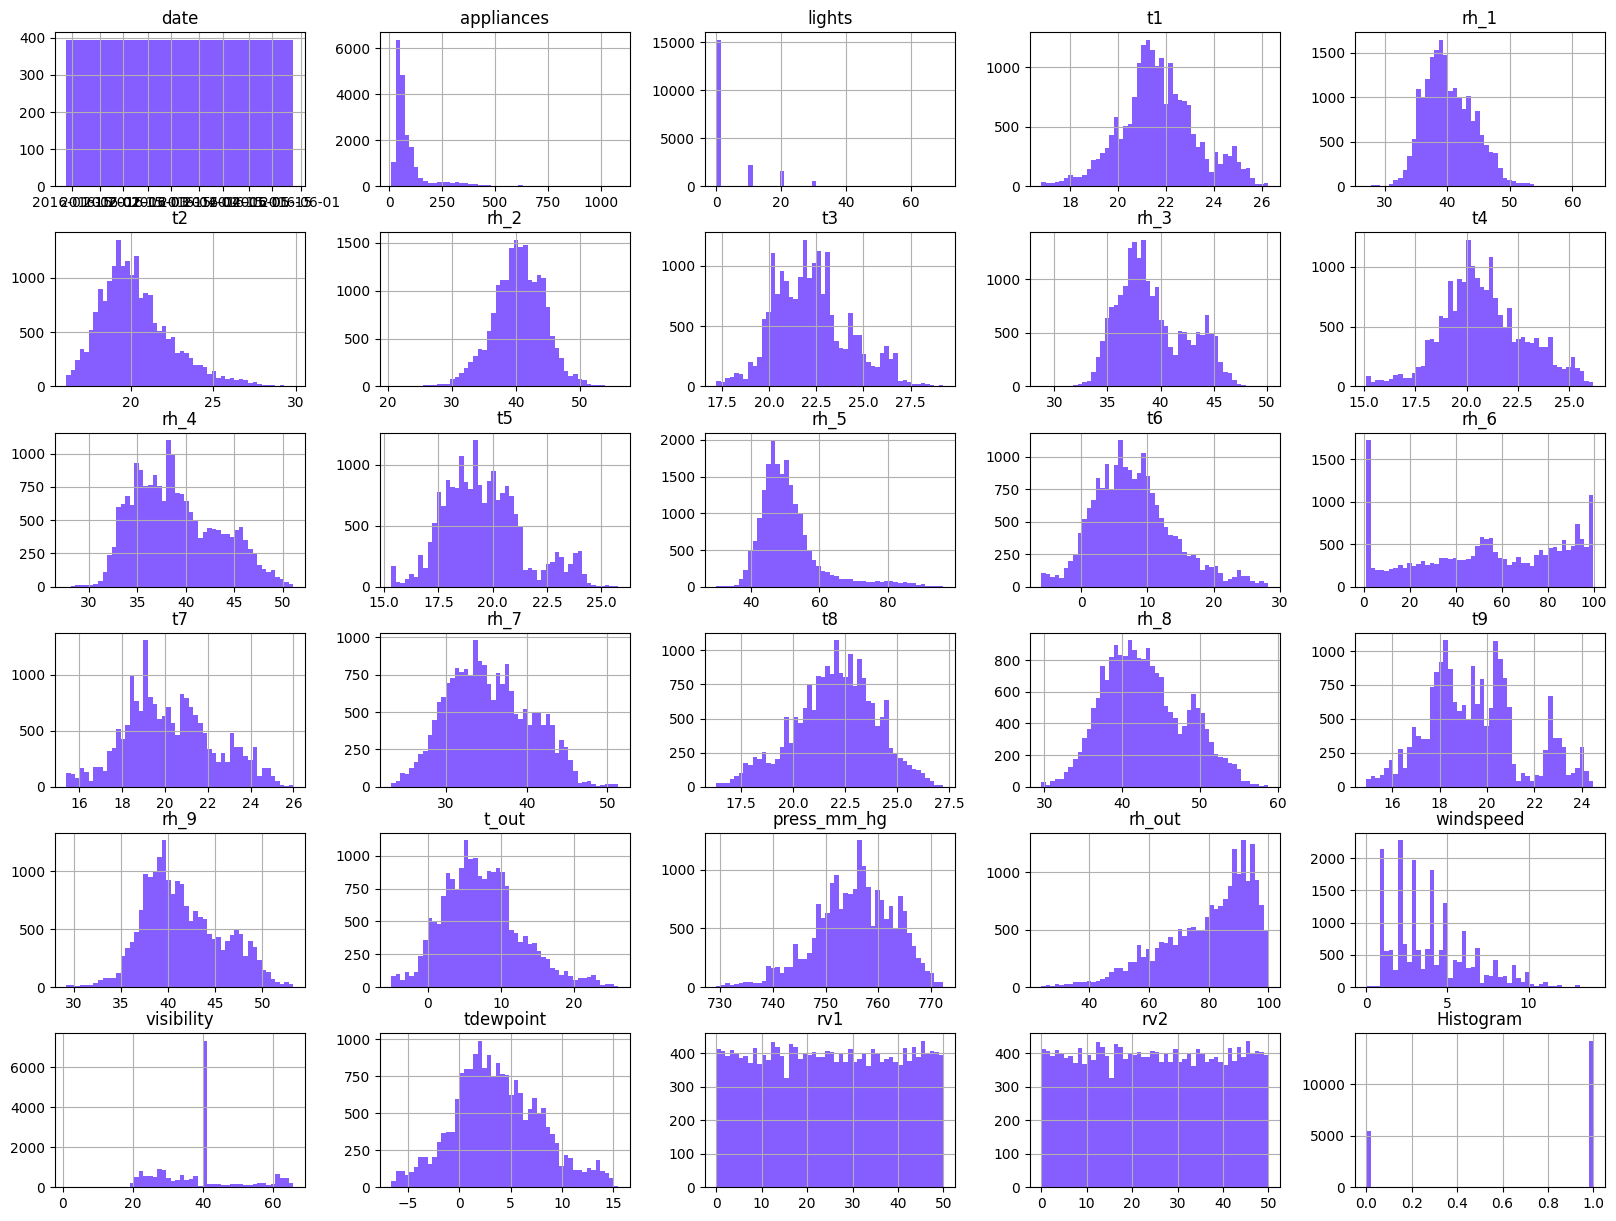

In [9]:
#Have an overall view of all columns to check if distribute uniformely
df.hist(bins=50, figsize=(20,15),color='#865DFF')
plt.title("Histogram")
plt.show()

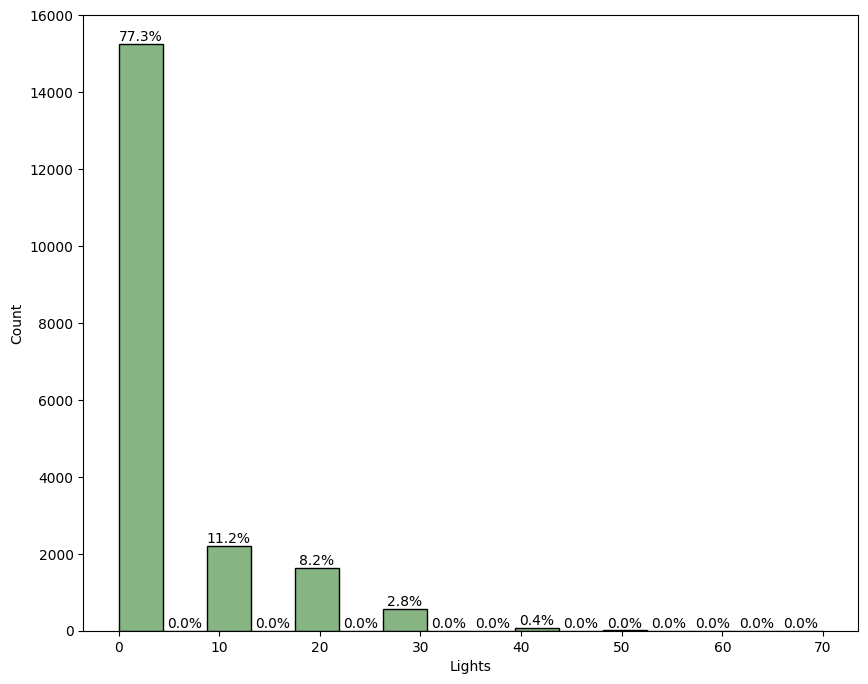

In [10]:
#There are several columns with irregular distribution, let have a closer look
fig, ax = plt.subplots(figsize=(10, 8))

#create the histplot with custom color
sns.histplot(data=df, x="lights", ax=ax, color = '#5D9C59')

#print the % of the entries
for p in ax.patches:
    ax.annotate(f"{p.get_height()/len(df):.1%}", (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

ax.set(xlabel='Lights', ylabel='Count')

plt.show()

In [11]:
df.drop(columns='lights',inplace=True)

#### 2.2 Correlation

Based on the heatmap I used to visualize the dataset's correlation, I found that RVs 1 and 2 weren't highly correlated with other features, thus allowing them to be dropped. To confirm this, I also generated a list of the top 30 correlations. This list led me to conclude that rv1, rv2, visibility, t6, and t9 can all be removed from the dataset.

<AxesSubplot: >

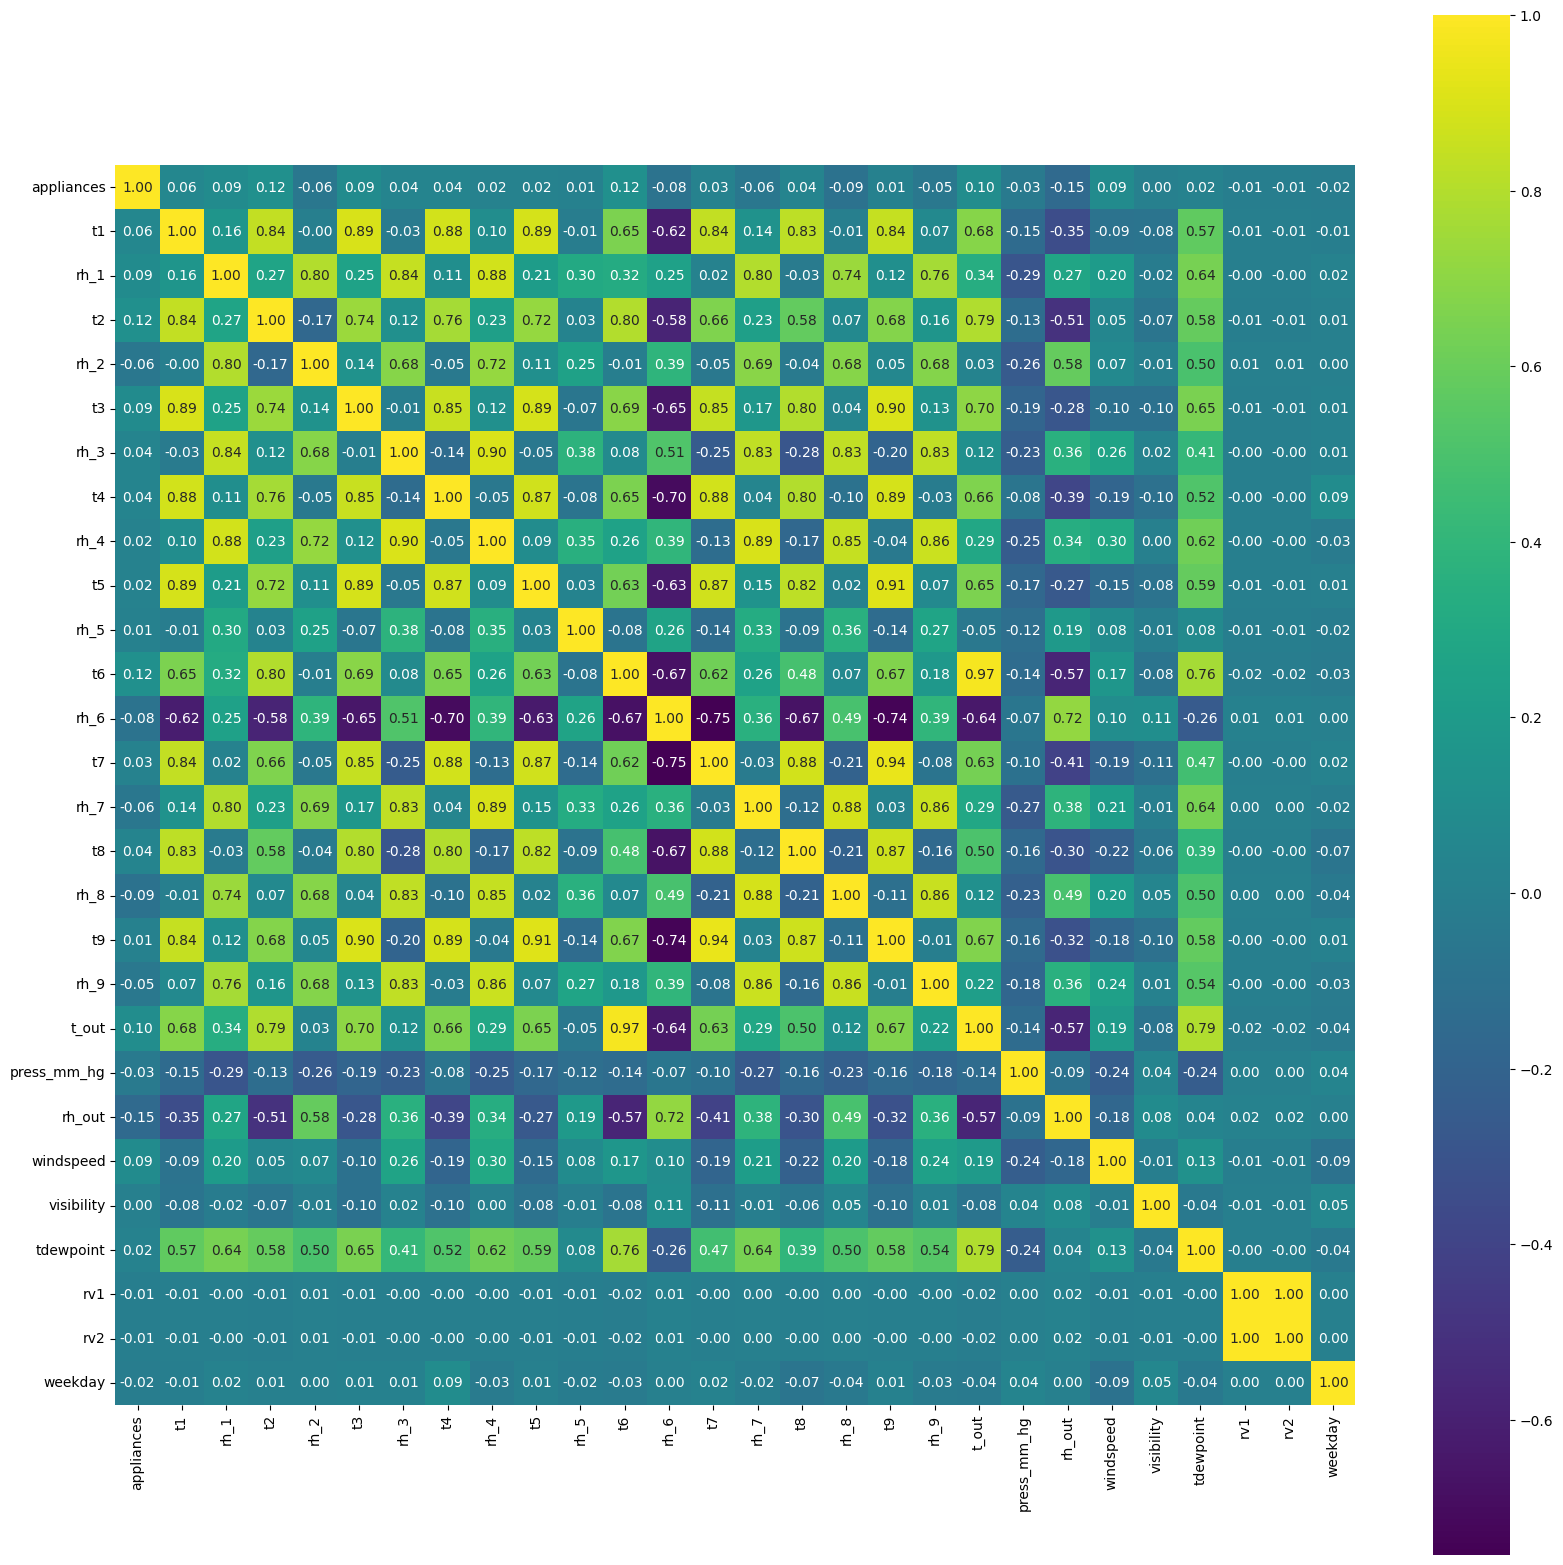

In [12]:
# calculate correlation matrix
corr = df.corr()

plt.figure(figsize=(20,20))

#printing heatmap
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis')

In [13]:
#we need to sort out the top most from the heatmap wo see better
#make a copy of corr but making diagonal and lower traingle to zero
corr_no_diag = np.tril(corr, k=-1)

#flatten the corr_no_diag to 1D and sort it into descending order
descen_corrs = np.sort(corr_no_diag.flatten())[::-1]

#indexes of the top 30 correlations
idx = np.argsort(corr_no_diag.flatten())[::-1][:30]

#print title
print("Top 30 correlations")

# print it using for loop
for i, index in enumerate(idx):
    
    #1D matrix to row and columns 
    row_index, col_index = np.unravel_index(index, corr.shape)
    
    #current pair of correlations
    c1 = corr.index[row_index]
    c2 = corr.columns[col_index]
    correlation = corr.iloc[row_index, col_index]
    
    #print
    print(f"{i+1}. {c1} - {c2}: {correlation:.4f}")


Top 30 correlations
1. rv2 - rv1: 1.0000
2. t_out - t6: 0.9748
3. t9 - t7: 0.9448
4. t9 - t5: 0.9111
5. t9 - t3: 0.9013
6. rh_4 - rh_3: 0.8990
7. rh_7 - rh_4: 0.8943
8. t3 - t1: 0.8924
9. t9 - t4: 0.8894
10. t5 - t3: 0.8882
11. t5 - t1: 0.8852
12. rh_8 - rh_7: 0.8840
13. t8 - t7: 0.8821
14. rh_4 - rh_1: 0.8804
15. t7 - t4: 0.8778
16. t4 - t1: 0.8770
17. t5 - t4: 0.8718
18. t7 - t5: 0.8706
19. t9 - t8: 0.8693
20. rh_9 - rh_7: 0.8587
21. rh_9 - rh_4: 0.8566
22. rh_9 - rh_8: 0.8558
23. t4 - t3: 0.8528
24. t7 - t3: 0.8474
25. rh_8 - rh_4: 0.8473
26. t9 - t1: 0.8448
27. rh_3 - rh_1: 0.8447
28. t7 - t1: 0.8387
29. t2 - t1: 0.8368
30. rh_9 - rh_3: 0.8335


In [14]:
df.drop(columns=["rv1","rv2","visibility","t6","t9"],inplace=True)

#### 2.3 Weekday & Weekend

Let's first chart the consumption of the appliances over time. We can see a pattern: there is a major spike in consumption followed by a return to normal levels every 4 to 7 days. One explanation for the observed pattern in the appliance consumption data is that consumption may be higher on weekends because more people are at home, while consumption may be lower on weekdays because people are at work or school.

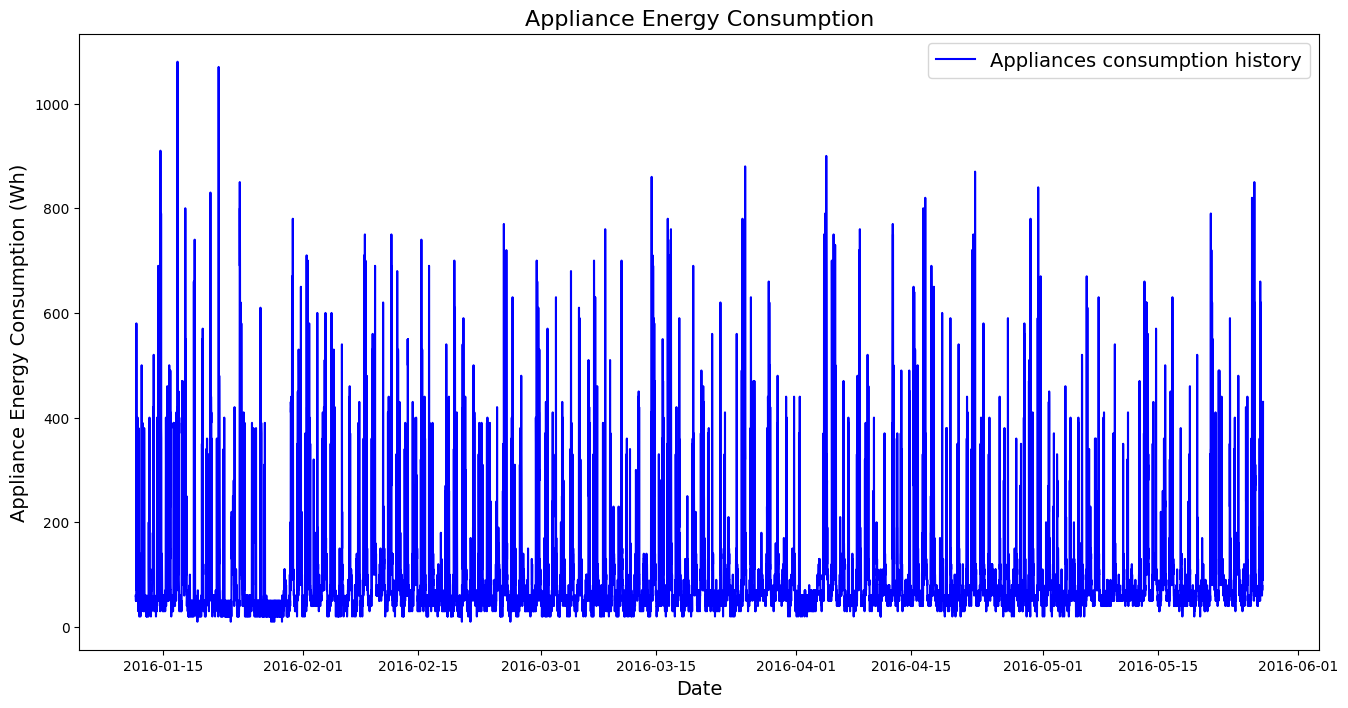

In [15]:
plt.figure(figsize=(16,8))

sns.lineplot(x='date', y='appliances', data=df, color='blue', label='Appliances consumption history')

#labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Appliance Energy Consumption (Wh)', fontsize=14)
plt.title('Appliance Energy Consumption', fontsize=16)

#visual explanation box
plt.legend(fontsize=14)
plt.show()

A statistical test was done to see if weekdays or weekends are when appliances use the most energy. The findings indicated that weekdays generally had greater mean energy consumption than weekends. That is unexpected because it is difficult to tell just by looking at something. I therefore choose to use T-statistic to more thoroughly analyse it.

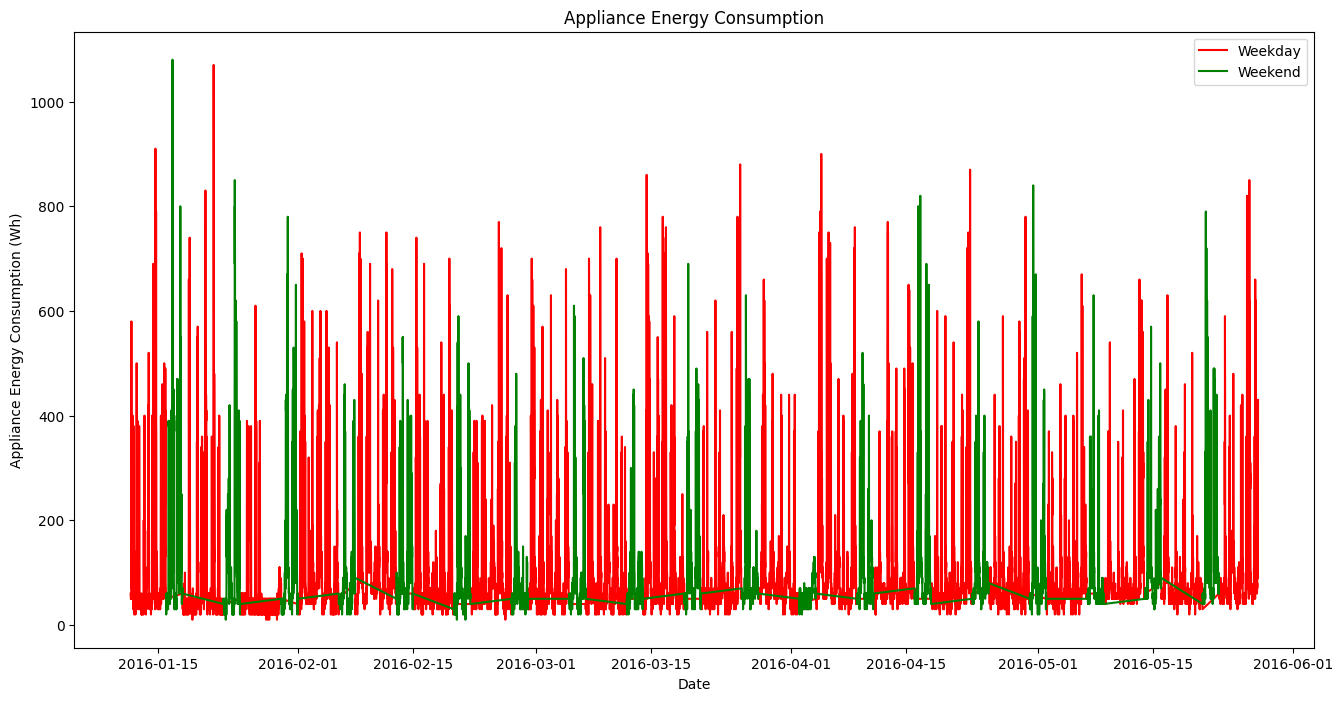

In [16]:
#new dataframe
new_weekday = df[df['weekday'] == 1]
new_weekend = df[df['weekday'] == 0]

#plotting with two colors
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='appliances', data=new_weekday, color='red', label='Weekday')
sns.lineplot(x='date', y='appliances', data=new_weekend, color='green', label='Weekend')

#title
plt.xlabel('Date')
plt.ylabel('Appliance Energy Consumption (Wh)')
plt.title('Appliance Energy Consumption')

#set legend
plt.legend()
plt.show()

In [17]:
from scipy import stats
weekday_energy = df[df['weekday'] == 1]['appliances']
weekend_energy = df[df['weekday'] == 0]['appliances']

#two sample testing
t_stat, p_value = stats.ttest_ind(weekday_energy, weekend_energy)

#measure difference between means of two group
print("t-statistic: ", t_stat)
#measure probability of obtaining the observed results under null hypothesis that there is no difference between means oftwo groups
print("p-value: ", p_value)

t-statistic:  -2.4498281536817212
p-value:  0.01430106721867294


The weekday mean is less than the weekend mean, as shown by the t-value statistic's of -2.449. While the remaining 98.6% indicates that the difference is real and not accidental, the p-value of 0.014 says that there is a 1.4% probability that the variation in means is due to random chance. We can therefore reach the conclusion that weekday energy consumption is lower than weekend energy consumption and reject the null hypothesis that there is no difference in mean energy between weekday and weekend.

To determine the significance of the mismatch, we can compute the absolute difference between the means of weekday and weekend energy use. When a difference is slight, we can consider it to be insignificant. If the difference is significant, it could be necessary to create separate models for weekdays and weekends in order to prevent bias. The calculation's outcome suggests that there isn't much of a difference, thus I've decided to ignore the distinction between weekday and weekend means.

In [18]:
#create new column
df['day_of_week'] = df['date'].dt.dayofweek

#group mean of weekday and mean of weekend
weekday_mean = df.loc[df['day_of_week'].isin([0, 1, 2, 3, 4]), 'appliances'].mean()
weekend_mean = df.loc[df['day_of_week'].isin([5, 6]), 'appliances'].mean()

print("Weekday mean: {:.2f}".format(weekday_mean))
print("Weekend mean: {:.2f}".format(weekend_mean))
print("Difference: {:.2f}".format(weekday_mean - weekend_mean))

Weekday mean: 96.59
Weekend mean: 100.58
Difference: -3.99


#### 2.4 Decompose time series

Based on the analysis, we can say that certain elements, like the weather or daily routines, have an impact on the pattern of energy consumption, as seen in the recurring pattern of moderate energy consumption for several days, followed by abrupt increases in energy consumption to high levels for a few days, and then a gradual decrease back to moderate levels over several days.

Also, the trend plot shows a cyclical pattern with an interval of around a month where the energy consumption levels change over time. While there are occasionally depressive moments, the main trend is generally upward. This implies that additional research may be warranted to determine whether there are any external factors influencing energy use.

It appears that there may be some underlying elements or patterns that are impacting the pattern of energy consumption in a cyclical way because the seasonal component of the time series exhibits a significant pattern of ups and downs that repeats over the whole time period. Future energy consumption forecasts and prediction may benefit from this.

Finally, the residual plot indicates that while the decomposition model is largely capturing the information in the data, there is still one pattern that requires additional research or modelling. Overall, this initial decomposition-based data exploration can direct additional time series data analysis and modelling.

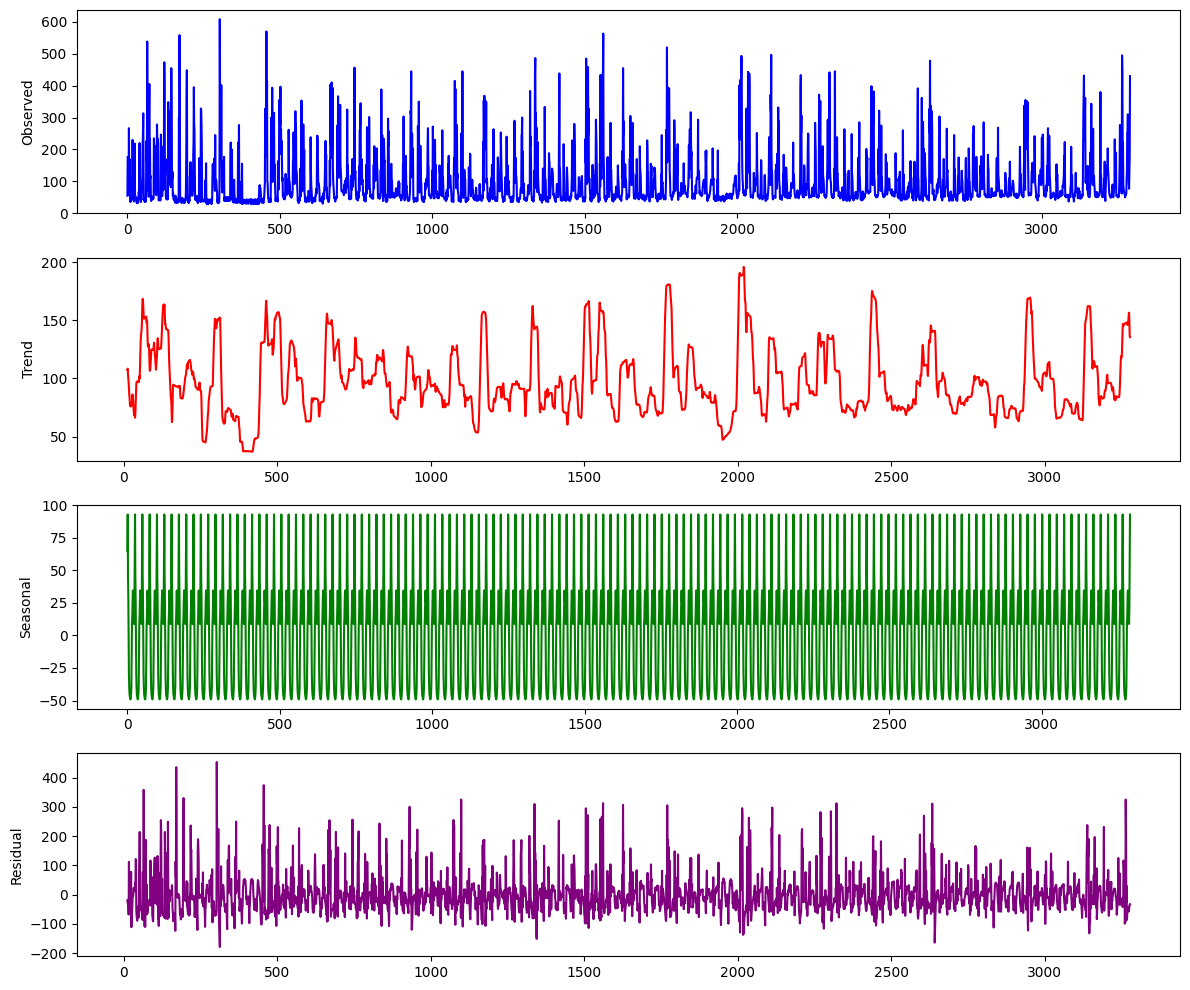

In [19]:
#calculate mean every day, resets index and 
#resample the data at daily frequency and create new df
df_hourly = df.resample('H', on='date').mean().reset_index()

#use this function to decompose time series
decomposition = sm.tsa.seasonal_decompose(df_hourly['appliances'], model='additive', period=24)

#plotting
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 10))
decomposition.observed.plot(ax=ax[0], legend=False, color='blue')
ax[0].set_ylabel('Observed')
decomposition.trend.plot(ax=ax[1], legend=False, color='red')
ax[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax[2], legend=False, color='green')
ax[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax[3], legend=False, color='purple')
ax[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


#### 2.5 Outliers

The appliances column appears to be an outlier with a significant number of huge outliers, as was previously mentioned. I reviewed all of the columns to find any more outliers that needed to be handled in order to make sure that the presence of outliers would not skew our findings.

Except for the appliances column, practically all columns contained outliers, but they were not noteworthy, according to the overview. Thus, based on the knowledge I gained from this graph, I made the decision to exclude some of the outliers.

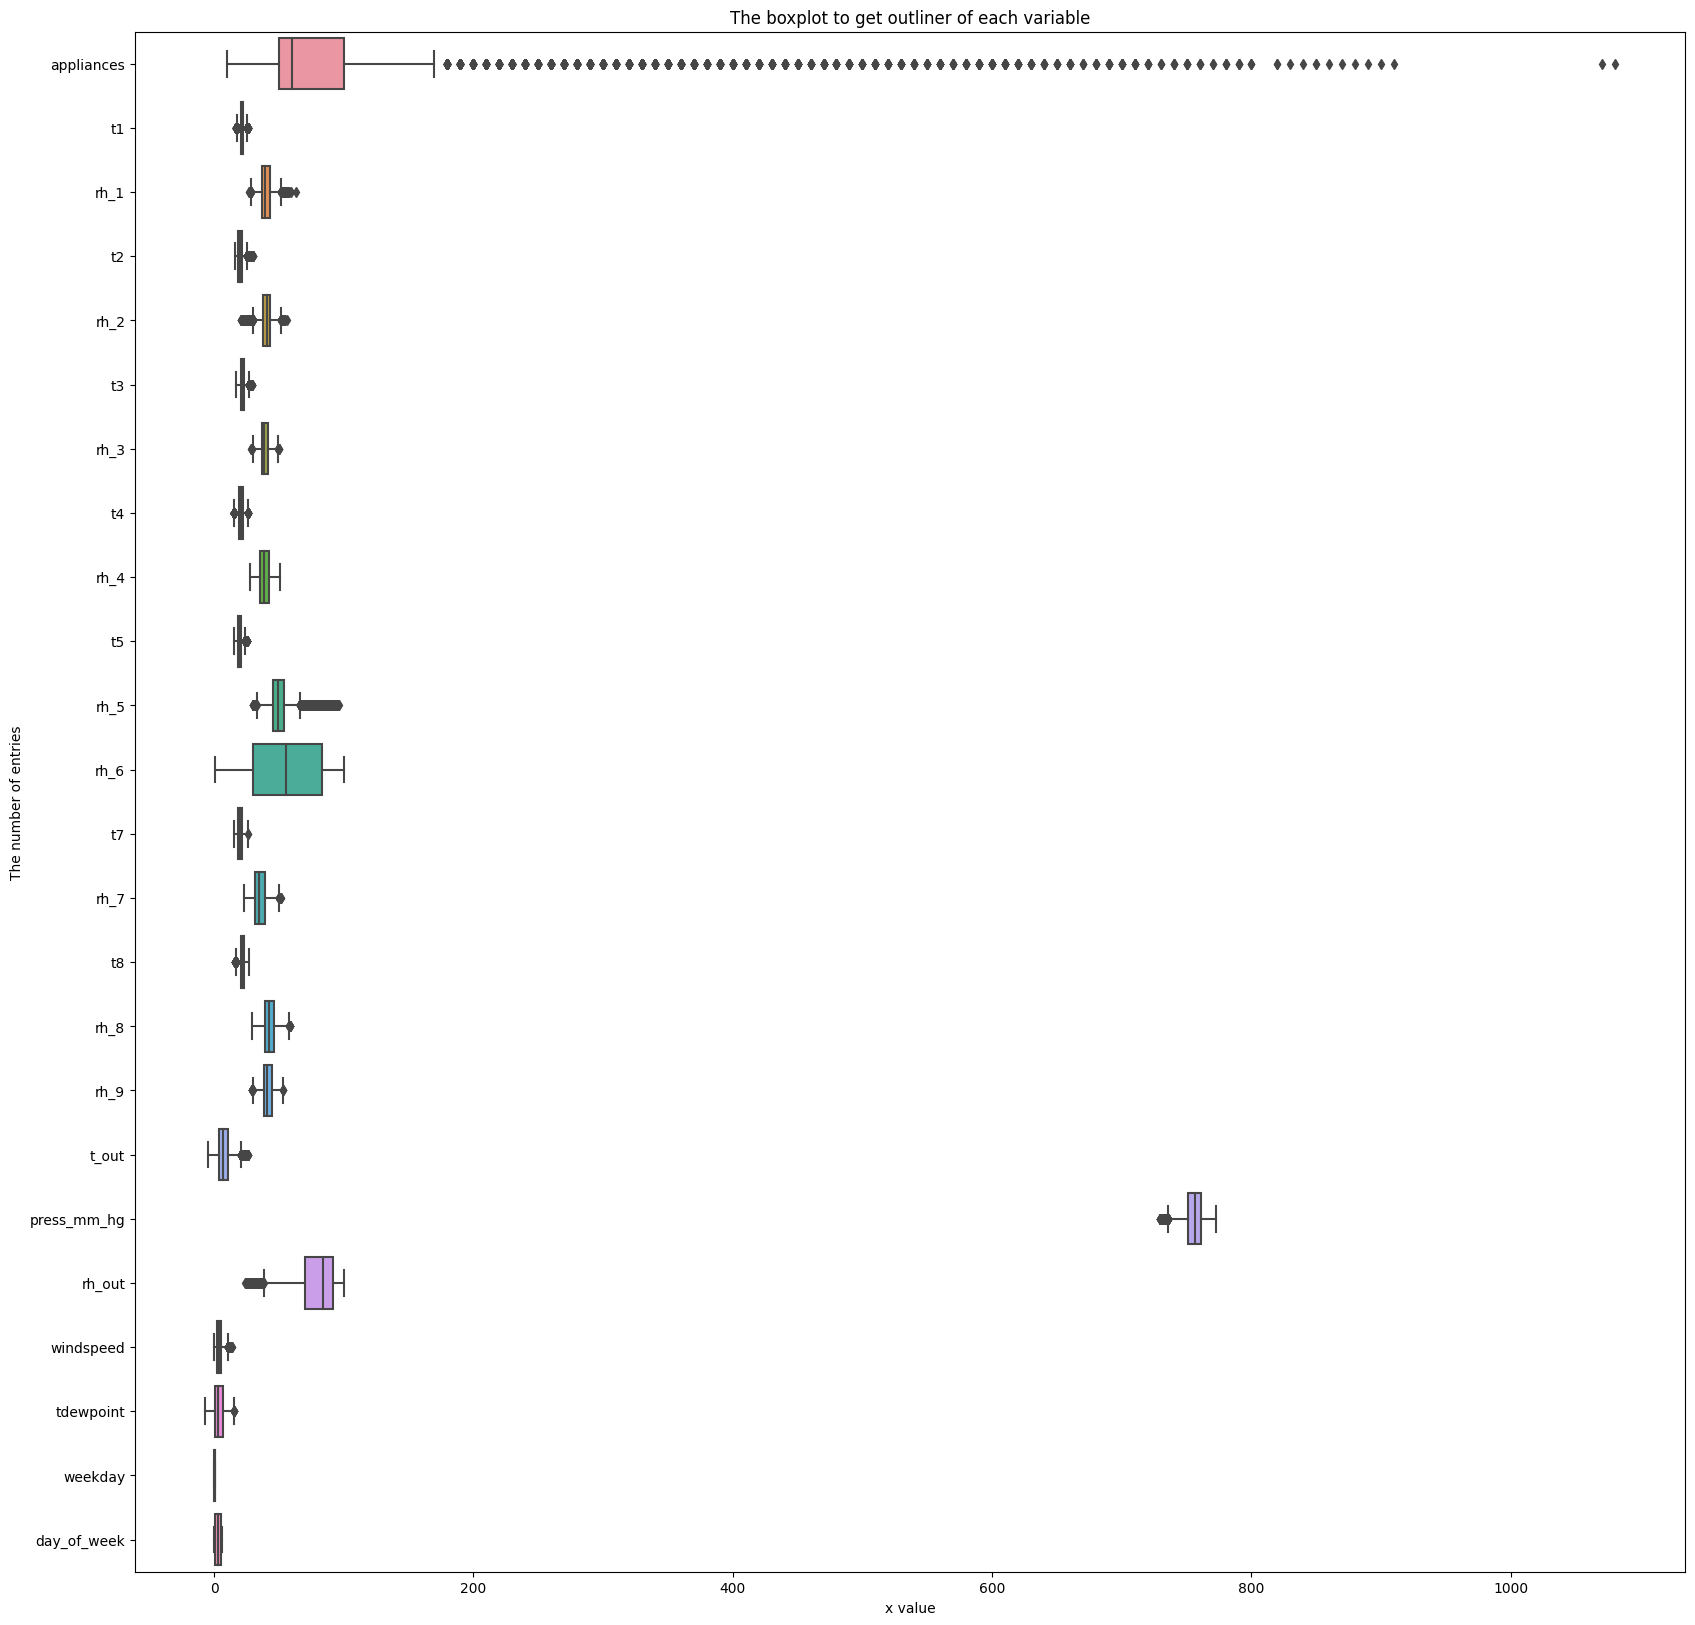

In [20]:
#method learned from workshop 2
#appliances's outliner are a lot
plt.figure(figsize=(20,20))
plt.title('The boxplot to get outliner of each variable')
sns.boxplot(data=df, orient='h')
plt.ylabel('The number of entries')
plt.xlabel('x value')
plt.show()

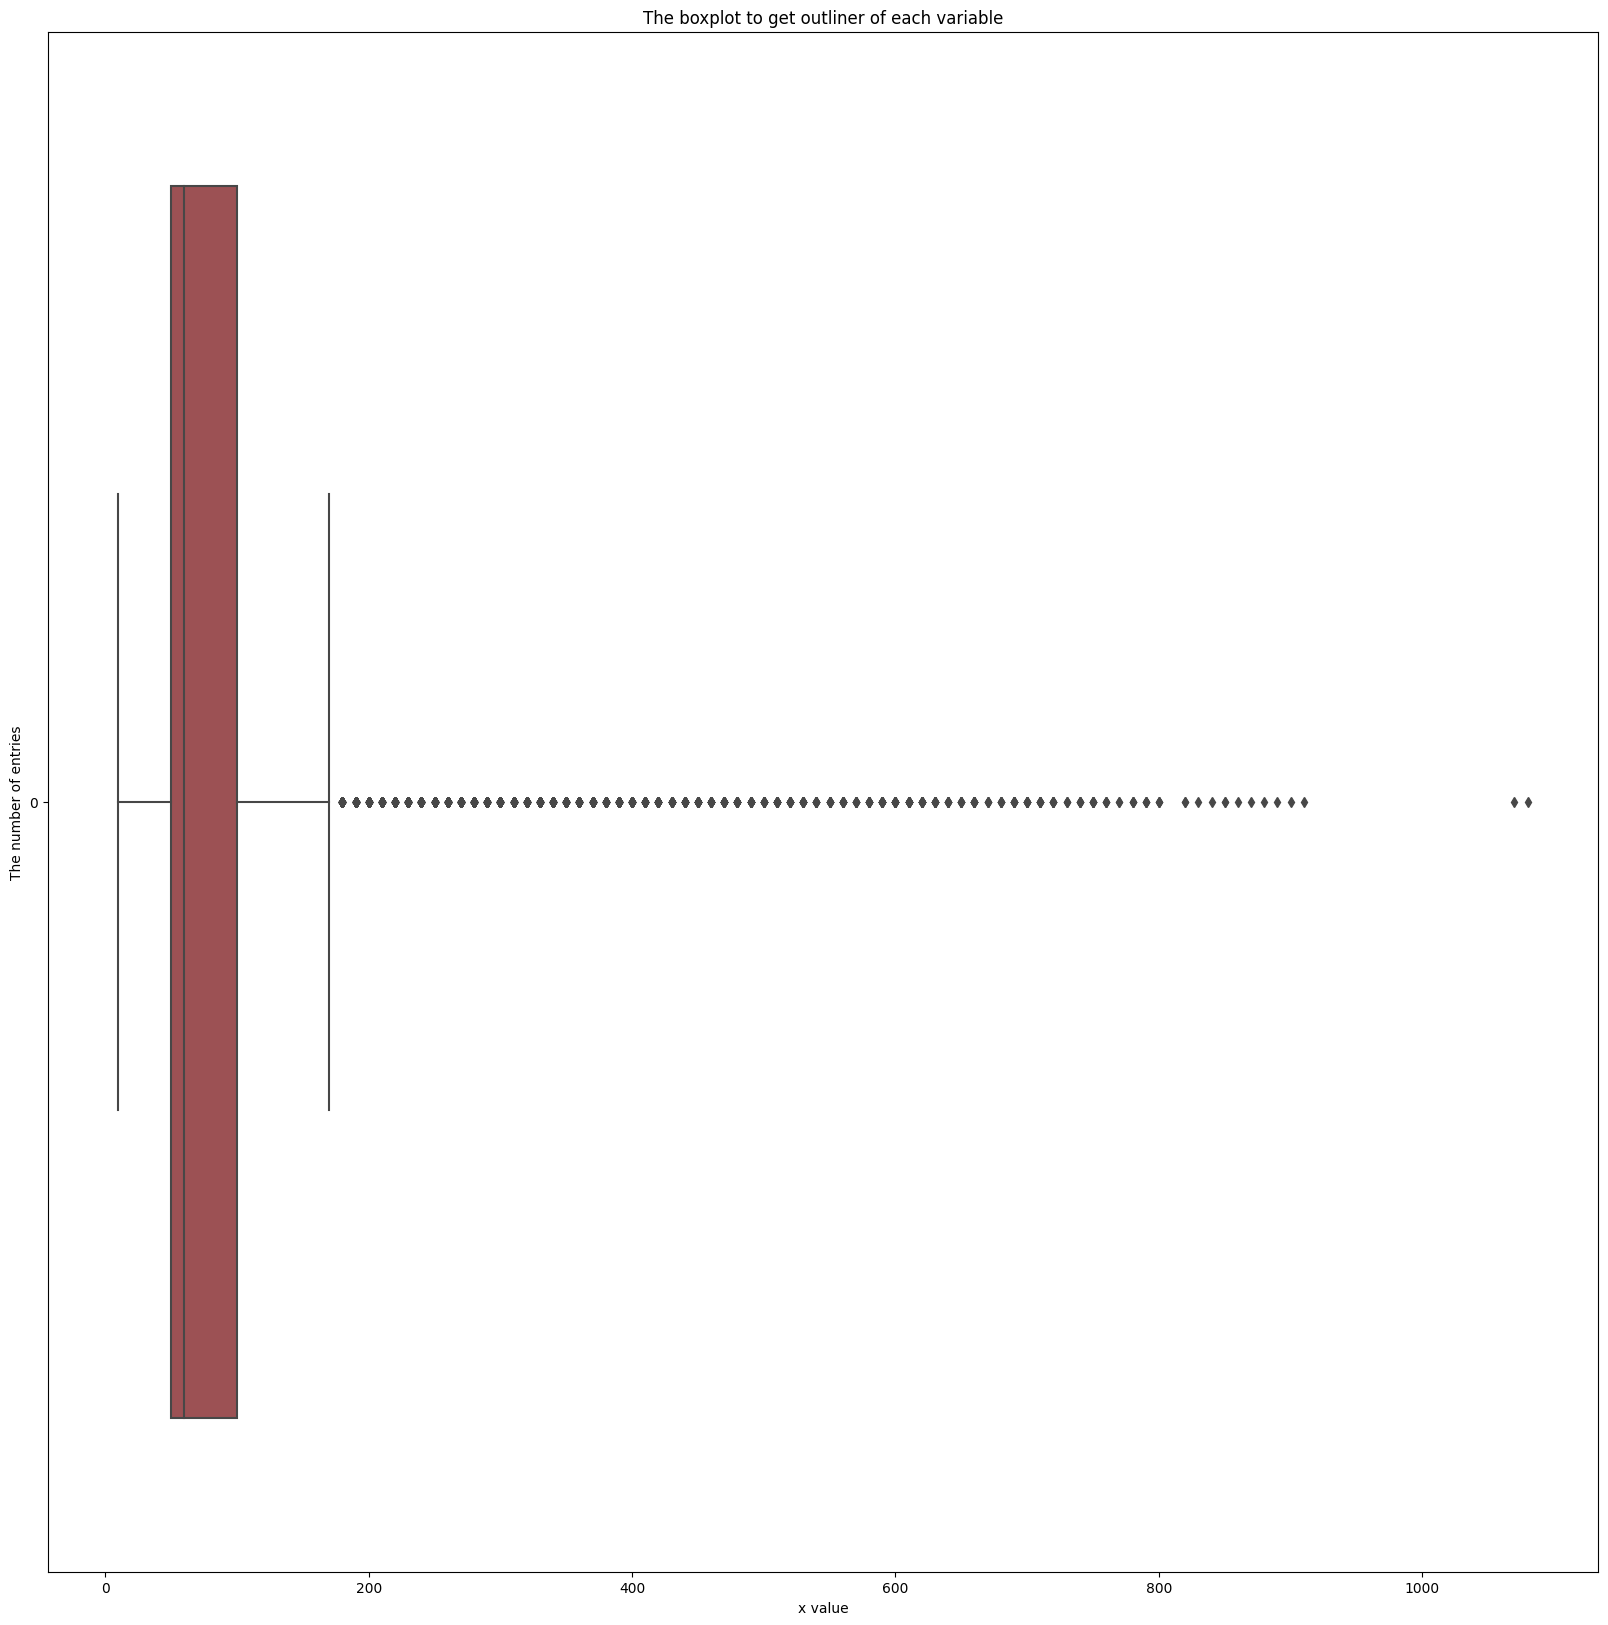

In [21]:
#lets get a closer look to Appliances
plt.figure(figsize=(20,20))
plt.title('The boxplot to get outliner of each variable')
sns.boxplot(data=df["appliances"], orient='h',color= '#A84448')
plt.ylabel('The number of entries')
plt.xlabel('x value')
plt.show()

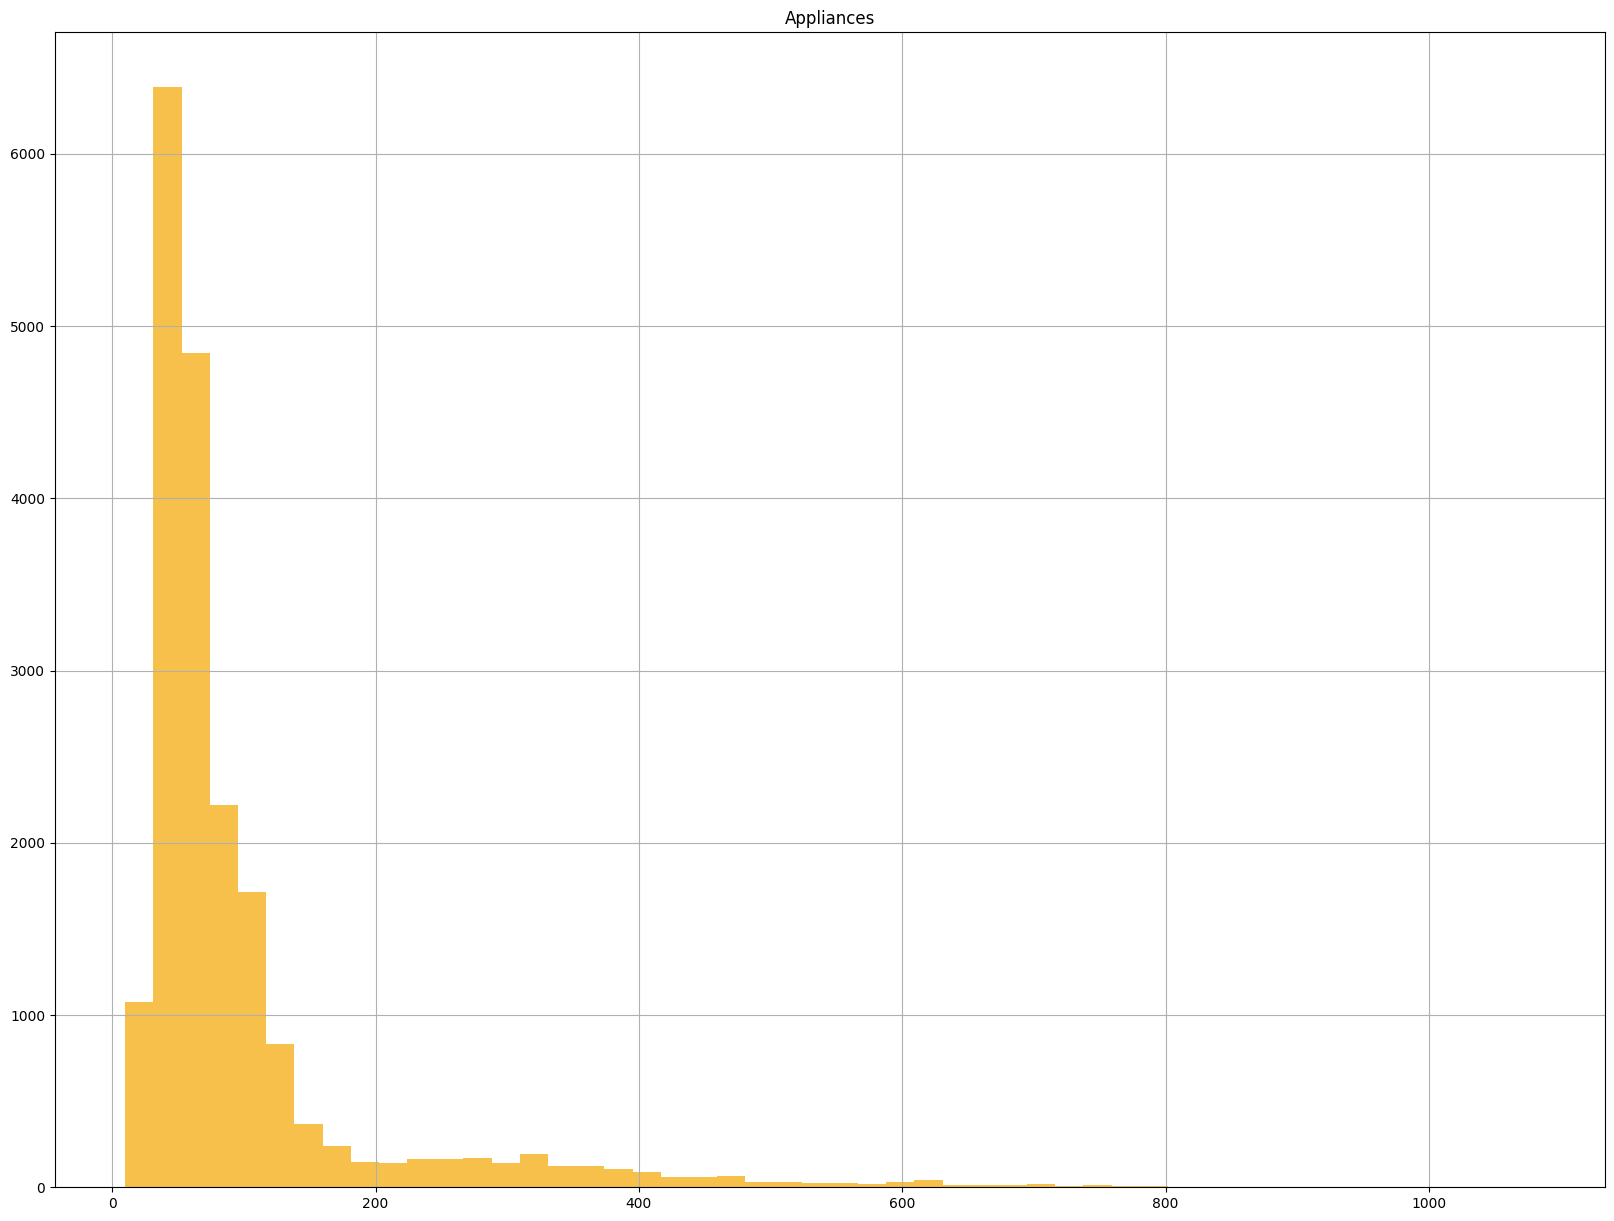

In [22]:
df['appliances'].hist(bins=50, figsize=(20,15),color='#F7C04A')
plt.title("Appliances")
plt.show()
#check outliers from 200 - 400

In [23]:
#drop outliers
abc = df.loc[df['appliances']>210,'appliances'].index
df.drop(index=abc,inplace=True)

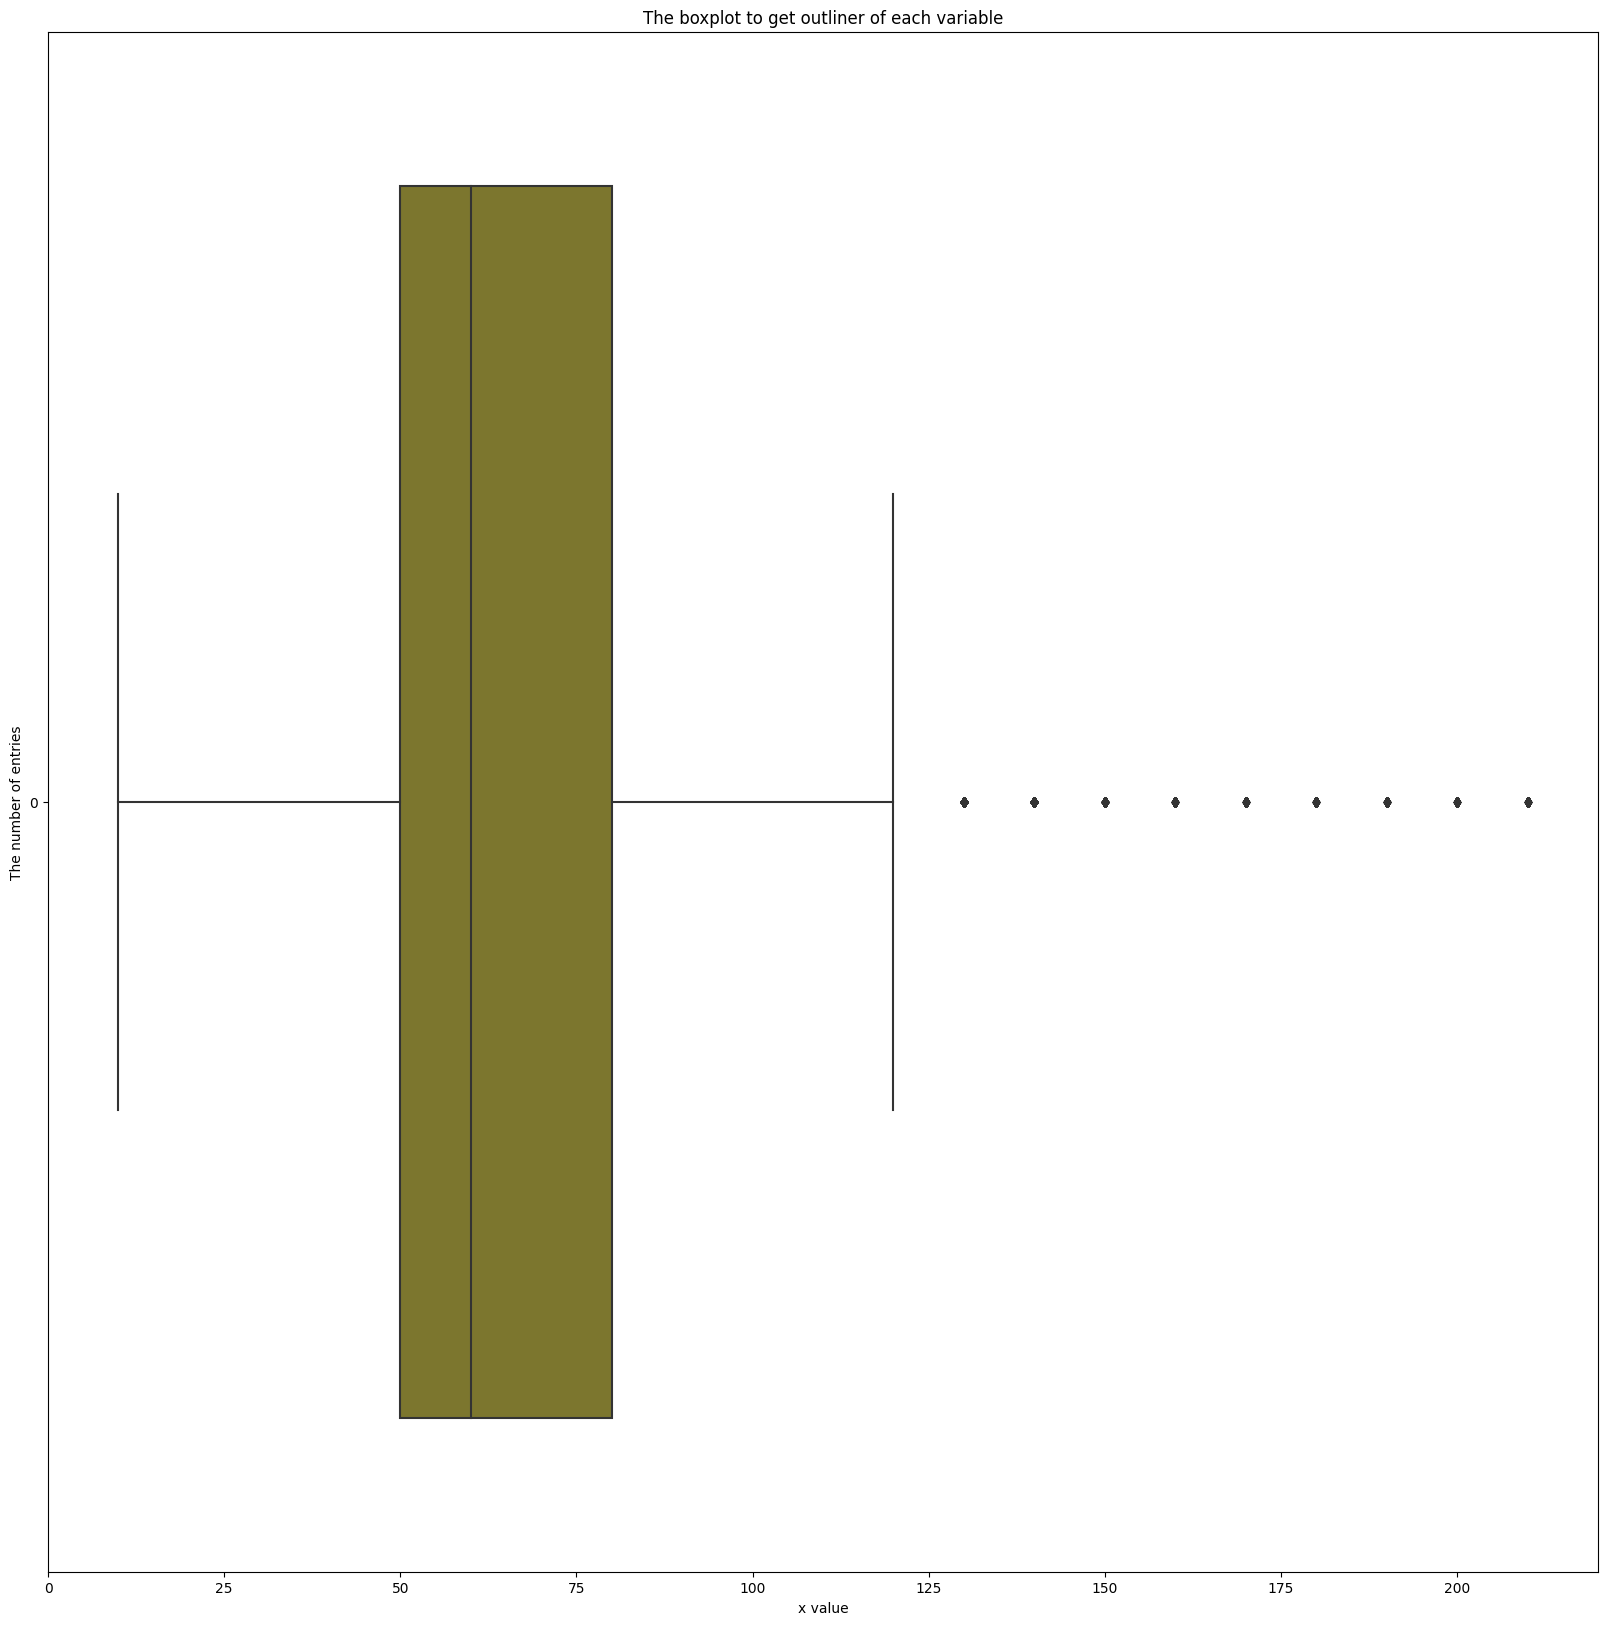

In [24]:
#lets get a closer look to Appliances, and it looks way more better
plt.figure(figsize=(20,20))
plt.title('The boxplot to get outliner of each variable')
sns.boxplot(data=df["appliances"], orient='h',color='#898121')
plt.ylabel('The number of entries')
plt.xlabel('x value')
plt.show()

#### 2.6 Train test split

In [25]:
# Preprocesse data, because dataframe aboved is just for data visualisation and decision making
df = pd.read_csv("./energydata_complete.csv", parse_dates=['date'])

#Based on the conclusion made avode, these will be dropped
df.drop(columns=["rv1", "rv2", "Visibility", "T6", "T9", "lights"], inplace=True)
abc = df.loc[df['Appliances'] > 210, 'Appliances'].index
df.drop(index=abc, inplace=True)


In [26]:
from sklearn.model_selection import train_test_split

#Define the X and y
X = df.drop('date', axis=1)
y = df['Appliances']

#call train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2.7 Scale

Because the MinMaxScaler is a widely used preprocessing method for scaling numerical features to a particular range, I choose to utilise it on this dataset. This method is appropriate for the dataset since it enhances the performance of the model by ensuring that all characteristics are on an equal scale and preventing some features from having an excessive influence on the model.

In [27]:
from sklearn.preprocessing import MinMaxScaler

#scale the data using MinMax
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2.8 Reconstruct

To make sure the ARIMA dataset had the appropriate format and index that the ARIMA model required, I made the decision to reconstruct it. The model's accuracy and performance were enhanced by this reconstruction, which made sure it could use the proper format and index.

In [28]:
#ARIMA ONLY
X_train_arima = pd.DataFrame(X_train, columns=X.columns)
X_test_arima = pd.DataFrame(X_test, columns=X.columns)
X_train_arima['date'] = df.iloc[X_train_arima.index]['date'].values
X_test_arima['date'] = df.iloc[X_test_arima.index]['date'].values
X_train_arima.set_index('date', inplace=True)
X_test_arima.set_index('date', inplace=True)

#### 2.9 Reshape

And for LSTM, I made the decision to use the numpy reshape() function to reshape the input data to have the shape (samples, time steps, and features). It enables me to comprehend the temporal structure of the data better.

In [29]:
#LSTM ONLY
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [30]:
#LSTM PRO ONLY
X_train_pro = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_pro = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

### 3. Implement prediction models

#### 3.1 Arima

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score

#apply auto arima to find the best hyperparameters
model = auto_arima(y_train, exogenous=X_train_arima.drop(columns=['Appliances']), seasonal=True, m=24, trace=True, suppress_warnings=True,
                    error_action='ignore', stepwise=True, max_order=10, max_p=6, max_q=6, max_d=2, max_P=4, max_Q=4, max_D=2)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=165.28 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=122636.754, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=122638.704, Time=35.76 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=122638.652, Time=18.17 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=144056.807, Time=0.07 sec
 ARIMA(0,0,0)(1,0,0)[24] intercept   : AIC=122638.659, Time=16.81 sec
 ARIMA(0,0,0)(0,0,1)[24] intercept   : AIC=122638.627, Time=5.54 sec
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=122640.613, Time=56.86 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=122636.801, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=122636.802, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[24] intercept   : AIC=122638.818, Time=0.64 sec

Best model:  ARIMA(0,0,0)(0,0,0)[24] intercept
Total fit time: 300.027 seconds


#### 3.2 LSTM (Simple)

In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
#create sequantial model
model_lstm = Sequential()
#add layer with 50 units, dense output layer and compile
model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer='adam')

#### 3.3 LSTM (Improved)

In [33]:
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
#create sequantial model
model_pro = Sequential()
#add layer with 50 units, dense output layer etc
model_pro.add(LSTM(100, input_shape=(X_train_pro.shape[1], X_train_pro.shape[2]), return_sequences=True))
model_pro.add(Dropout(0.2))
model_pro.add(LSTM(50, return_sequences=True))
model_pro.add(Dropout(0.2))
model_pro.add(LSTM(25))
model_pro.add(Dense(1))
#compile with optimizer
optimizer_pro = Adam(lr=0.001)
model_pro.compile(loss='mse', optimizer=optimizer_pro)

### 4. Train prediction models

#### 4.1 Arima

In [34]:
#fit the model to data
model.fit(y_train, exogenous=X_train_arima.drop(columns=['Appliances']))

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 24),
      suppress_warnings=True)

#### 4.2 LSTM (Simple)

In [35]:
#fit the model to data
history = model_lstm.fit(
    X_train_lstm, y_train, epochs=70, batch_size=10,
    validation_data=(X_test_lstm, y_test), verbose=2, shuffle=False)

Epoch 1/70


2023-03-26 21:47:17.586685: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1253/1253 - 2s - loss: 2707.6604 - val_loss: 1430.9011 - 2s/epoch - 1ms/step
Epoch 2/70
1253/1253 - 1s - loss: 1136.9052 - val_loss: 1082.4293 - 710ms/epoch - 567us/step
Epoch 3/70
1253/1253 - 1s - loss: 978.9767 - val_loss: 807.9200 - 709ms/epoch - 566us/step
Epoch 4/70
1253/1253 - 1s - loss: 527.9055 - val_loss: 334.9102 - 710ms/epoch - 566us/step
Epoch 5/70
1253/1253 - 1s - loss: 213.8319 - val_loss: 152.4457 - 708ms/epoch - 565us/step
Epoch 6/70
1253/1253 - 1s - loss: 106.6231 - val_loss: 85.4501 - 710ms/epoch - 566us/step
Epoch 7/70
1253/1253 - 1s - loss: 59.8953 - val_loss: 49.5620 - 709ms/epoch - 566us/step
Epoch 8/70
1253/1253 - 1s - loss: 34.1019 - val_loss: 28.8444 - 714ms/epoch - 570us/step
Epoch 9/70
1253/1253 - 1s - loss: 19.4671 - val_loss: 16.9008 - 707ms/epoch - 564us/step
Epoch 10/70
1253/1253 - 1s - loss: 11.2158 - val_loss: 9.9751 - 708ms/epoch - 565us/step
Epoch 11/70
1253/1253 - 1s - loss: 6.5566 - val_loss: 5.9550 - 711ms/epoch - 567us/step
Epoch 12/70
1253/1253 -

#### 4.3 LSTM (Improved)

In [36]:
#fit the model to data
history2 = model_pro.fit(
    X_train_pro, y_train, epochs=100, batch_size=32,
    validation_data=(X_test_pro, y_test), verbose=2, shuffle=False)

Epoch 1/100
392/392 - 3s - loss: 4720.7192 - val_loss: 4254.5483 - 3s/epoch - 8ms/step
Epoch 2/100
392/392 - 1s - loss: 3722.5225 - val_loss: 3466.6392 - 564ms/epoch - 1ms/step
Epoch 3/100
392/392 - 1s - loss: 3034.8735 - val_loss: 2844.4214 - 562ms/epoch - 1ms/step
Epoch 4/100
392/392 - 1s - loss: 2491.7585 - val_loss: 2351.9375 - 566ms/epoch - 1ms/step
Epoch 5/100
392/392 - 1s - loss: 2066.3203 - val_loss: 1967.9091 - 566ms/epoch - 1ms/step
Epoch 6/100
392/392 - 1s - loss: 1739.8531 - val_loss: 1675.5620 - 562ms/epoch - 1ms/step
Epoch 7/100
392/392 - 1s - loss: 1496.7351 - val_loss: 1460.2236 - 566ms/epoch - 1ms/step
Epoch 8/100
392/392 - 1s - loss: 1322.8367 - val_loss: 1308.3456 - 565ms/epoch - 1ms/step
Epoch 9/100
392/392 - 1s - loss: 1204.9042 - val_loss: 1207.0552 - 568ms/epoch - 1ms/step
Epoch 10/100
392/392 - 1s - loss: 1130.2906 - val_loss: 1144.1221 - 568ms/epoch - 1ms/step
Epoch 11/100
392/392 - 1s - loss: 1087.1401 - val_loss: 1108.2778 - 567ms/epoch - 1ms/step
Epoch 12/10

### 5. Test predictin models and show results

#### 5.1 Arima

In [37]:
#predit
train_preds_arima = model.predict(n_periods=len(X_train_arima), exogenous=X_train_arima.drop(columns=['Appliances']))
test_preds_arima = model.predict(n_periods=len(X_test_arima), exogenous=X_test_arima.drop(columns=['Appliances']))

#evaluate
test_rmse_arima = np.sqrt(mean_squared_error(y_test, test_preds_arima))
test_r2_arima = r2_score(y_test, test_preds_arima)

print(f'Root Mean Squared Error: {test_rmse_arima}')
print(f'R-squared Error: {test_r2_arima}')

Root Mean Squared Error: 32.79685949981423
R-squared Error: -0.0008404757929503237


#### 5.2 LSTM (Simple)

In [38]:
#predit
train_preds_lstmS = model_lstm.predict(X_train_lstm)
test_preds_lstmS = model_lstm.predict(X_test_lstm)

#evaluate
test_rmse_lstmS = np.sqrt(mean_squared_error(y_test, test_preds_lstmS))
test_r2_lstmS = r2_score(y_test, test_preds_lstmS)

print(f'Root Mean Squared Error: {test_rmse_lstmS}')
print(f'R-squared Error: {test_r2_lstmS}')

168/168 [==============================] - 0s 277us/step
Root Mean Squared Error: 0.3214073007551103
R-squared Error: 0.9999038804304942


#### 5.3 LSTM (Improved)

In [39]:
#predict
train_preds_pro = model_pro.predict(X_train_pro)
test_preds_pro = model_pro.predict(X_test_pro)

#evalue
test_rmse_pro = np.sqrt(mean_squared_error(y_test, test_preds_pro))
test_r2_pro = r2_score(y_test, test_preds_pro)

print(f'Root Mean Squared Error: {test_rmse_pro}')
print(f'R-squared Error: {test_r2_pro}')

168/168 [==============================] - 0s 469us/step
Root Mean Squared Error: 1.2364713826036249
R-squared Error: 0.9985774469187955


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

Compare with the results you have obtained in Assignment 1.

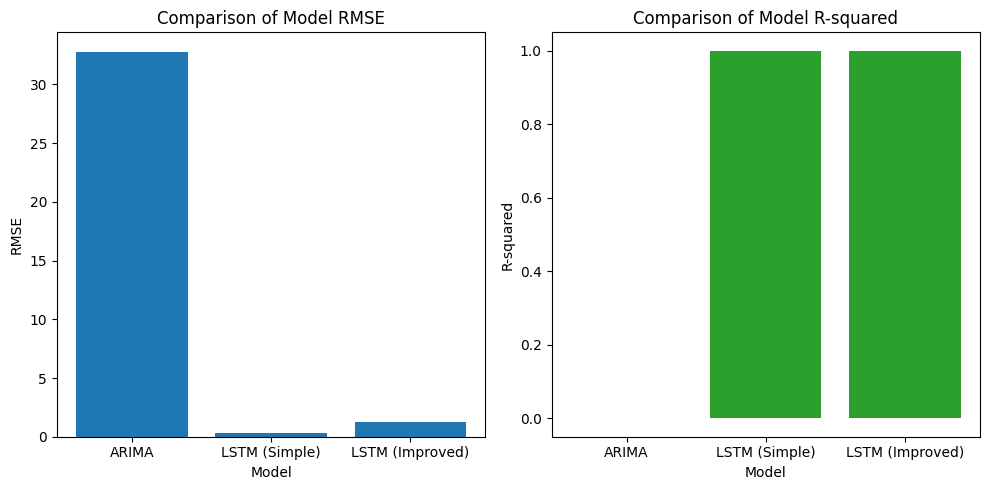

In [40]:
import matplotlib.pyplot as plt

#define the value to the plot
rmse_values = [test_rmse_arima, test_rmse_lstmS, test_rmse_pro]
r2_values = [test_r2_arima, test_r2_lstmS, test_r2_pro]

#define labels
model_labels = ['ARIMA', 'LSTM (Simple)', 'LSTM (Improved)']

#plotting
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#RMSE plot
axs[0].bar(model_labels, rmse_values, color='tab:blue')
axs[0].set_title('Comparison of Model RMSE')
axs[0].set_xlabel('Model')
axs[0].set_ylabel('RMSE')
#R2 plot
axs[1].bar(model_labels, r2_values, color='tab:green')
axs[1].set_title('Comparison of Model R-squared')
axs[1].set_xlabel('Model')
axs[1].set_ylabel('R-squared')

plt.tight_layout()
plt.show()



#### Justification:
I chose the ARIMA and LSTM models for the Appliance Energy Consumption dataset because they are commonly used for time series analysis and have demonstrated good forecasting performance. ARIMA allows me to capture autocorrelation and seasonality in data, which is important in time series analysis. Furthermore, by using LSTM, I can benefit from the model's ability to capture long-term dependencies in data, which is useful in capturing complex temporal patterns.

As a result, based on the Root Mean Squared Error and R-squared Error values, the LSTM Simple model appears to have performed the best, with a lower RMSE and a higher R-squared value when compared to the other models. The ARIMA model had a very high RMSE and a negative R-squared value, indicating poor performance. When compared to the LSTM Simple model, the LSTM Pro model had a higher RMSE and a slightly lower R-squared value, indicating that it was not the best-performing model of the three. As a result, the LSTM Simple model is the best option among these three.

#### Assigment 1 Results
##### Simple Linear Regression
Train Score: 0.30437353403277767

Test Score: 0.30680694383591733

Root Mean Squared Error: 0.3636660706618237

R-squared Error: 0.30680694383591733

##### Polynomial Linear Regression
Train Score: 0.7568559415176329

Test Score: 0.4075986224839996

Root Mean Squared Error: 0.33618916471969734

R-squared Error: 0.4075986224839996

##### Polynomial Linear Regression with Ridge
Train Score: 0.6413661808064269

Test Score: 0.5418915072981463

Root Mean Squared Error: 0.2956377264948065

R-squared Error: 0.5418915072981463

#### Assigment 2 Results
##### ARIMA
Root Mean Squared Error: 32.79685949981423

R-squared Error: -0.0008404757929503237

##### LSTM Simple
Root Mean Squared Error: 0.3346114447288587

R-squared Error: 0.9998958205826634

##### LSTM Pro
Root Mean Squared Error: 0.6712542576321572

R-squared Error: 0.999580748670272

#### Justification: 
Because score() is only for linear regression, I can't use it to measure ARIMA or LSTM. In this case, I would only compare the root mean squared error and the r-squared error. According to the evaluation results, the best model for this particular dataset appears to be the LSTM Simple model, which has the lowest RMSE and highest R-squared score. Although the Polynomial Linear Regression with Ridge performed reasonably well, with a low RMSE and a high R-squared score, the test score was lower than the train score, indicating possible overfitting. With a high RMSE and a negative R-squared score, the ARIMA model performed the worst, indicating that it did not fit the data well.

### 7. Reflection / Next Action

Based on the the performance of my model, maybe I can explore different techniques to select the correct number of epochs. The optimal number of epochs had a significant impact on the performance of my model, and there are a variety of techniques that I can use to determine the appropriate value. 

Some common techniques include cross-validation, early stopping, and grid search. By experimenting with these techniques, I might be able to improve the performance of my model and achieve better results.

### 8. References

docs.scipy.org. (n.d.). scipy.stats.ttest_ind — SciPy v1.4.1 Reference Guide. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.
pandas.pydata.org. (n.d.). pandas.DataFrame.resample — pandas 1.5.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html.
matplotlib.org. (n.d.). matplotlib.pyplot.legend — Matplotlib 3.3.4 documentation. [online] Available at: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html.
numpy.org. (n.d.). numpy.where — NumPy v1.22 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.where.html.
seaborn.pydata.org. (n.d.). seaborn.lineplot — seaborn 0.11.2 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.lineplot.html.
Team, K. (n.d.). Keras documentation: Dense layer. [online] keras.io. Available at: https://keras.io/api/layers/core_layers/dense/.
Team, K. (n.d.). Keras documentation: LSTM layer. [online] keras.io. Available at: https://keras.io/api/layers/recurrent_layers/lstm/.
www.statsmodels.org. (n.d.). statsmodels.tsa.seasonal.seasonal_decompose — statsmodels. [online] Available at: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html.
www.statsmodels.org. (n.d.). statsmodels.tsa.arima.model.ARIMA — statsmodels. [online] Available at: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html [Accessed 26 Mar. 2023].
www.statsmodels.org. (n.d.). statsmodels.tsa.arima.model.ARIMA.fit — statsmodels. [online] Available at: https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.fit.html [Accessed 26 Mar. 2023].
Workshop 6 - https://myuni.adelaide.edu.au/courses/86390/files/12579783/download
Workshop 7 - https://myuni.adelaide.edu.au/courses/86390/files/12620400?wrap=1